#Proyecto Final Data Science -  Entrega Final

##"Análisis Integral de Salud y Condición Física: De Datos a Decisiones"

###Profesor: Gustavo Benítez
###Tutores: Hugo Mon, Ignacio Manuel Fernández
###Alumno: Mauricio Horacio Zenere -
### LinkedIn: https://www.linkedin.com/in/mauriciozenere/
### Comisión: 61220

#**Abstract**
Este proyecto de Ciencia de Datos se enfoca en un conjunto de datos que abarca aspectos relacionados con la salud, la condición física y las características de individuos. Con variables que van desde la edad hasta la capacidad de salto en largo, junto con una clasificación en clases estratificadas (A, B, C y D), el objetivo es realizar un análisis exploratorio de datos (EDA) exhaustivo, identificar patrones, proponer visualizaciones que proporcionen insights valiosos. Además, se explorarán posibles objetivos comerciales, y se considerará el contexto analítico y el problema comercial subyacente.
Este nombre del Proyecto refleja la amplitud del mismo, el que abarca aspectos relacionados con la salud, la condición física y la toma de decisiones basadas en datos. También indica la orientación hacia la comprensión completa de la información disponible y su aplicación en la toma de decisiones informadas. Por lo que es pausible, de ser ampliado y que surjan nuevos planteos durante el desarrollo del mismo.

#**Contexto Analítico y Problema Comercial**
El contexto analítico involucra la recopilación de datos sobre la salud y la condición física de las personas, con el objetivo de comprender las relaciones y los factores que influyen en la clasificación. El problema comercial subyacente radica en cómo utilizar esta información para tomar decisiones informadas en campos como el fitness, la atención médica y los seguros. Identificar patrones y relaciones puede conducir a estrategias comerciales más efectivas y al mejoramiento de la calidad de vida de las personas.

#**Objetivos Comerciales**
Los gimnasios pueden utilizar los resultados para personalizar programas de entrenamiento.
Las compañías de seguros pueden ajustar las primas según la salud y condición física de los asegurados.
Las clínicas de salud pueden identificar factores de riesgo en función de la presión sanguínea y el índice de grasa corporal.


#**Storytelling**
Se adjunta link al archivo con documentación del proyecto
https://docs.google.com/document/d/1mmuohbrdmFg7jsE1HCHnCLXt2FkiygvD/edit?usp=drive_link&ouid=109752500742878770982&rtpof=true&sd=true



# Obtención de los datos


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import os

drive.mount('/content/gdrive')
data = pd.read_excel ('/content/gdrive/MyDrive/CODERHOUSE/DATA_SCIENCE/PROYECTO D.S. 2/bodyPerformance.xlsx')

Mounted at /content/gdrive


# Información del Dataset


- ## Descripción de Variables y Dominio


- age: edad de las personas.
- gender: masculino o femenino
- height_cm: altura de las personas expresada en centímetros
- weight_kg: peso en kilogramos
- body fat%: el indice de grasa corporal
- diastolic: presión sanguínea diastólica minima
- systolic: presión sanguínea sistólica mínima
- gripForce: fuerza de agarre de mano
- sit and bend forward_cm: capacidad de sentarse y tratar de llegar con la cabeza a las rodillas, medida en centímetros para medir la elongación de las personas
- sit-ups counts: cantidad de abdominales que puede hacer una persona
- broad jump_cm: salto en largo en centímetros
- class: divide a las personas en clases a, b, c y d, siendo la mejor A, estratificadas

### Identificación de Outliers


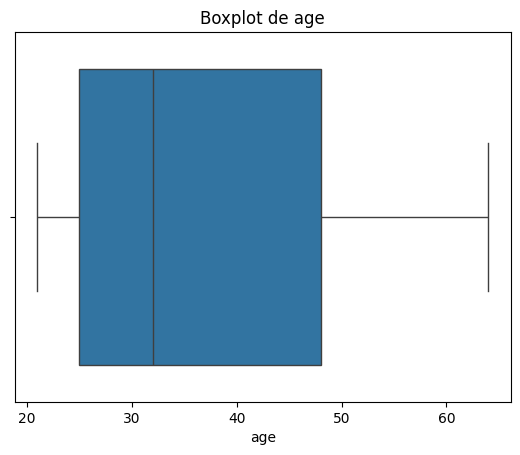

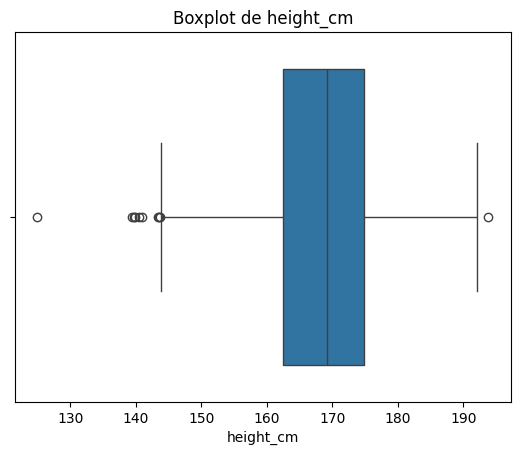

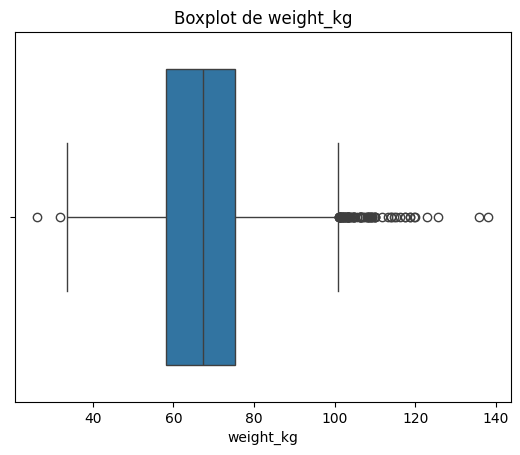

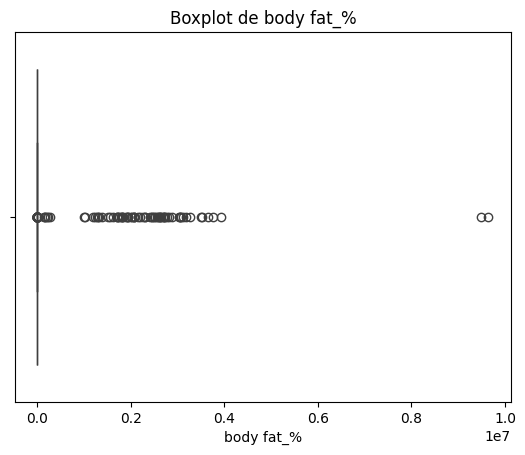

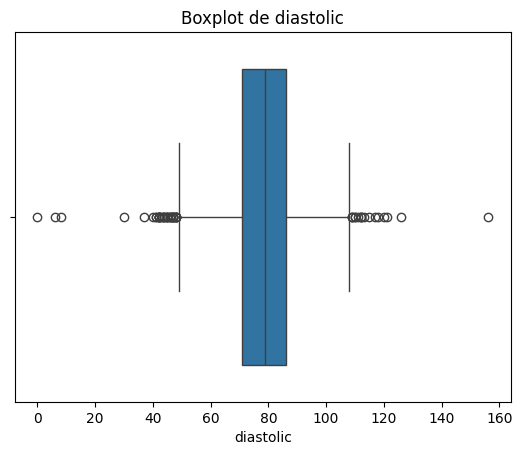

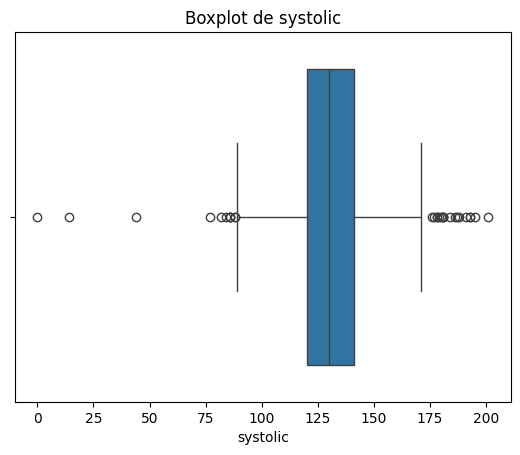

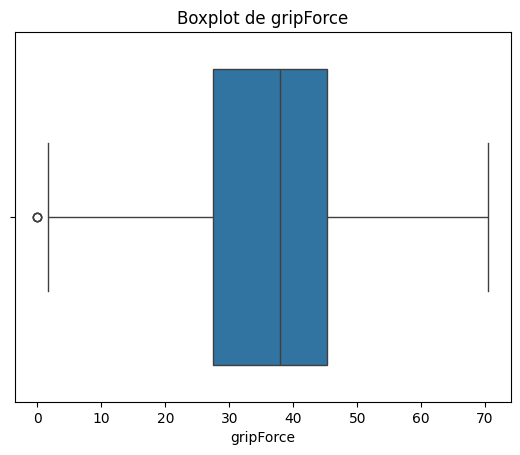

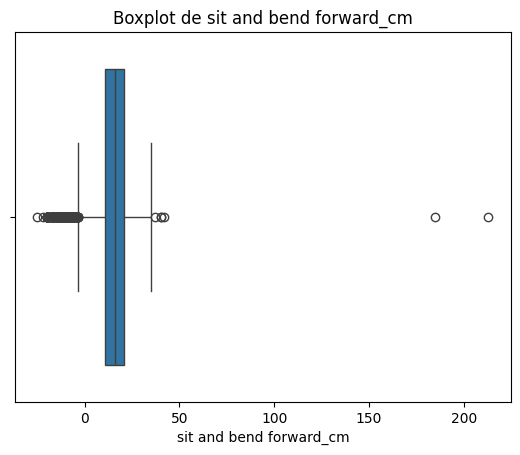

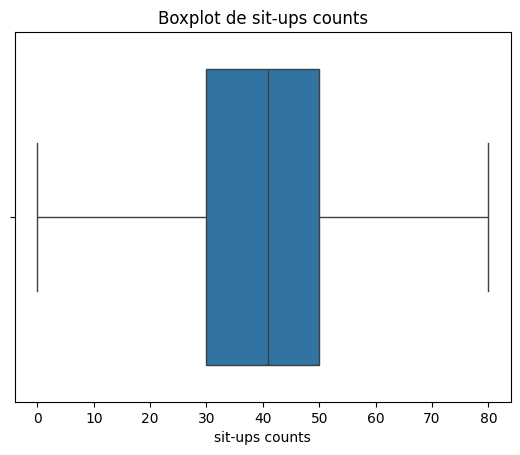

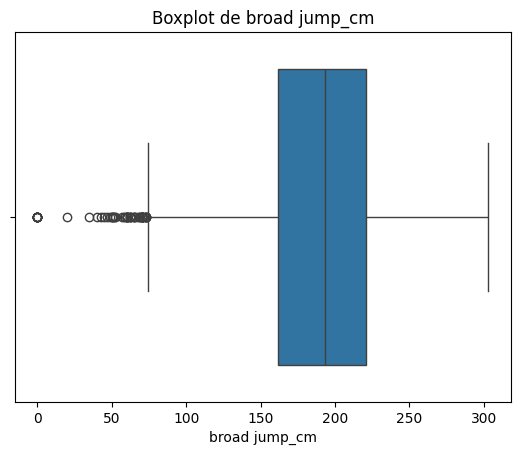

Registros con outliers:
        age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
47     26.0       1      172.1      66.10        24.9       62.0     102.0   
58     42.0       1      174.1     103.10        30.5       78.0     123.0   
75     22.0       1      171.9      78.46        22.9       64.0     116.0   
77     21.0       2      158.1      53.60   2763524.0       70.0     115.0   
136    61.0       2      153.2      62.20        37.0       71.0     111.0   
...     ...     ...        ...        ...         ...        ...       ...   
13280  26.0       1      173.5      68.70   1516476.0       78.0     120.0   
13301  26.0       1      175.4      74.70        18.2       93.0     150.0   
13318  25.0       1      187.9      94.90        19.4       68.0     107.0   
13357  56.0       1      173.0      52.60        12.9       92.0     141.0   
13380  42.0       1      172.0      76.30        32.8      100.0     147.0   

       gripForce  sit and bend forward_

In [3]:
numericas = ['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']

for column in numericas:
    sns.boxplot(x=data[column])
    plt.title("Boxplot de " + column)
    plt.xlabel(column)
    plt.show()

#rango entre cuartiles
Q1 = data[numericas].quantile(0.25)
Q3 = data[numericas].quantile(0.75)
IQR = Q3 - Q1

# Identificar los outliers
outliers = ((data[numericas] < (Q1 - 1.5 * IQR)) | (data[numericas] > (Q3 + 1.5 * IQR))).any(axis=1)

# Mostrar los registros que contienen outliers
outlier_rows = data[outliers]
print("Registros con outliers:")
print(outlier_rows)

### Borrado de Outliers
Teniendo en cuenta que los Outliers representan una porción pequeña de los datos pero con varianzas muy significativas para el proyecto, se proceder al borrado de los mismos. Son 736 de un total de 13393.

In [4]:
# Eliminar las filas que contienen outliers
df = data[~outliers]

# Mostrar el DataFrame limpio
print("DataFrame sin outliers:")
print(df)

DataFrame sin outliers:
        age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0       1      172.3      75.24        21.3       80.0     130.0   
1      25.0       1      165.0      55.80        15.7       77.0     126.0   
2      31.0       1      179.6      78.00        20.1       92.0     152.0   
3      32.0       1      174.5      71.10        18.4       76.0     147.0   
4      28.0       1      173.8      67.70        17.1       70.0     127.0   
...     ...     ...        ...        ...         ...        ...       ...   
13388  25.0       1      172.1      71.80        16.2       74.0     141.0   
13389  21.0       1      179.7      63.90        12.1       74.0     128.0   
13390  39.0       1      177.2      80.50        20.1       78.0     132.0   
13391  64.0       2      146.1      57.70        40.4       68.0     121.0   
13392  34.0       1      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_

- ## Primeras Informaciones sobre el Dataset

In [5]:
df.head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [6]:
df.describe()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000
mean,36.669274,1.370546,168.520265,67.026426,22.955392,78.761215,130.167812,37.060276,15.973728,40.322936,191.433918
std,13.572654,0.482970,8.291392,11.405515,6.997896,10.425092,14.353624,10.578131,6.972545,13.953401,38.706701
min,21.000000,1.000000,144.000000,34.500000,3.000000,49.000000,89.000000,1.600000,-3.700000,0.000000,75.000000
25%,25.000000,1.000000,162.400000,58.000000,17.900000,71.000000,120.000000,27.600000,11.500000,31.000000,163.000000
50%,32.000000,1.000000,169.100000,67.200000,22.600000,79.000000,130.000000,38.000000,16.500000,42.000000,194.000000
75%,48.000000,2.000000,174.600000,74.900000,27.700000,86.000000,141.000000,45.300000,20.900000,51.000000,222.000000
max,64.000000,2.000000,191.800000,100.800000,43.300000,108.000000,171.000000,70.500000,35.200000,80.000000,303.000000


- ### Histograma Edad, Peso y Altura


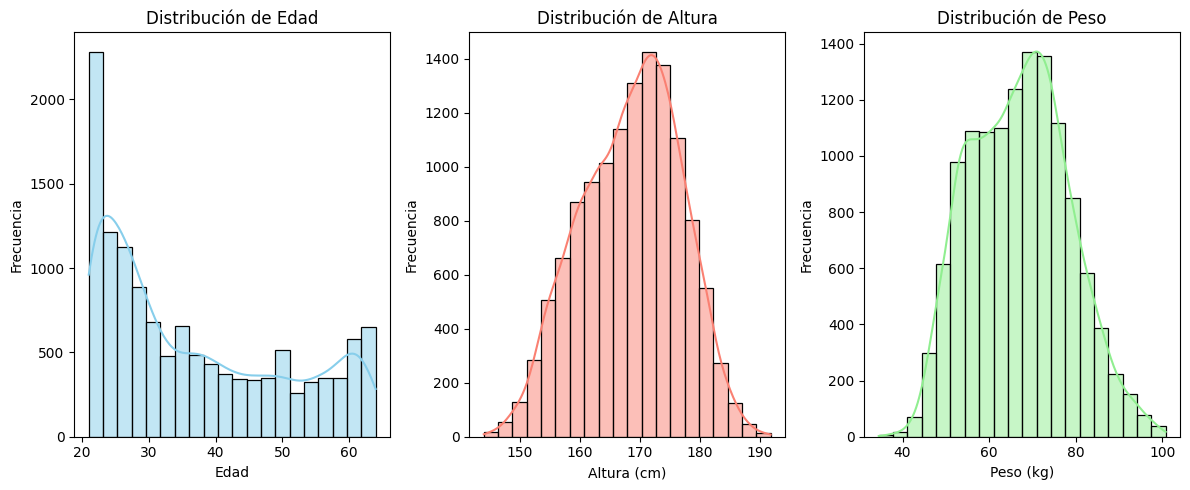

In [7]:
plt.figure(figsize=(12, 5))

# Histograma de 'Edad'
plt.subplot(131)
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad')

# Histograma de 'Altura'
plt.subplot(132)
sns.histplot(df['height_cm'], bins=20, kde=True, color='salmon')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Altura')

# Histograma de 'Peso'
plt.subplot(133)
sns.histplot(df['weight_kg'], bins=20, kde=True, color='lightgreen')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Peso')

plt.tight_layout()
plt.show()

- ### Diagrama de Dispersión Presión Diastolica y Sistolica


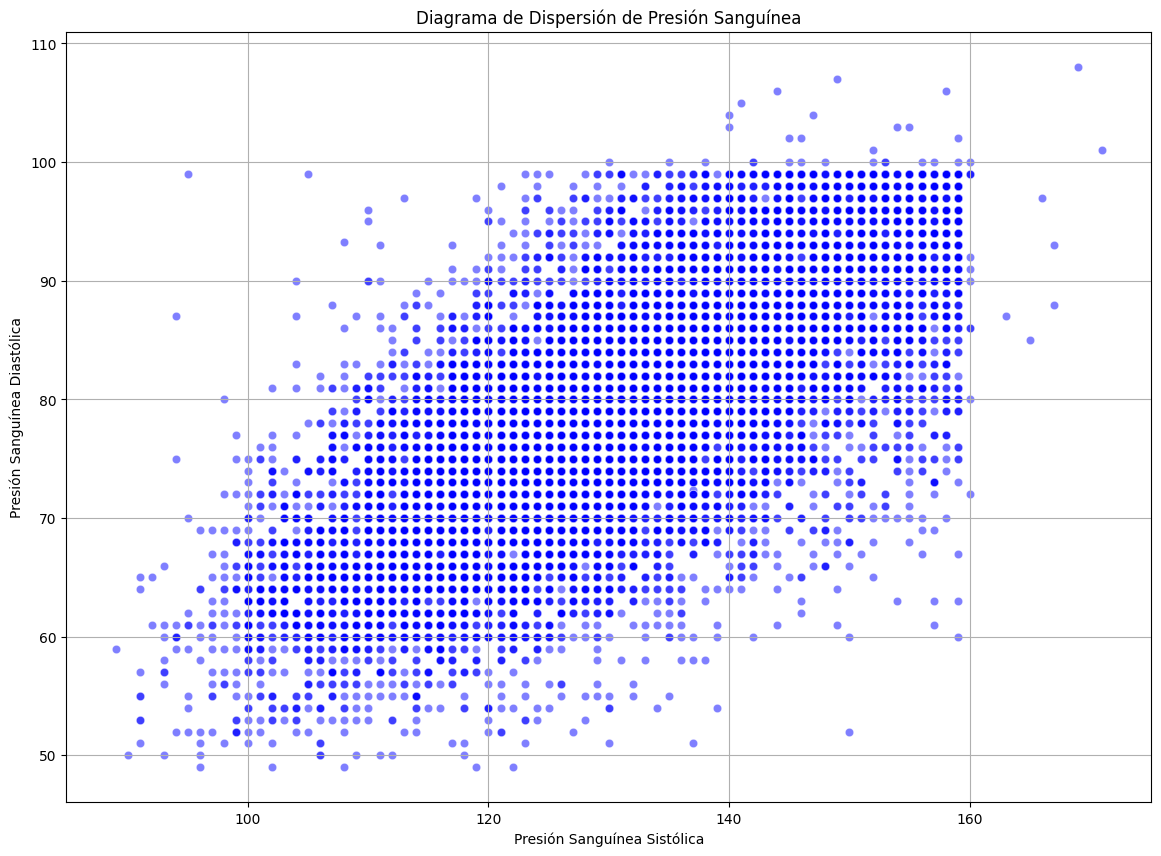

In [8]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='systolic', y='diastolic', color='blue', alpha=0.5)

plt.title('Diagrama de Dispersión de Presión Sanguínea')
plt.xlabel('Presión Sanguínea Sistólica')
plt.ylabel('Presión Sanguínea Diastólica')

plt.grid(True)
plt.show()

- ### Boxplot Edad y Clase

<ipython-input-10-c24e254251bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class', y='age', palette='Set3')


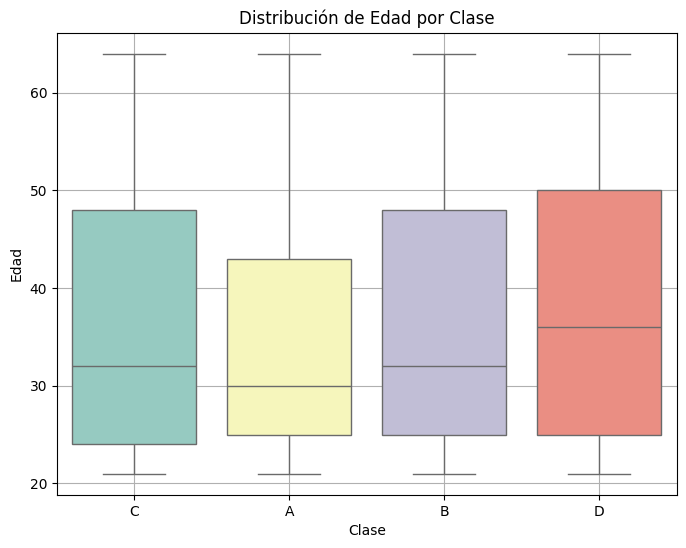

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='class', y='age', palette='Set3')

plt.title('Distribución de Edad por Clase')
plt.xlabel('Clase')
plt.ylabel('Edad')

plt.grid(True)
plt.show()

- ### Mapa de Correlación entre Variables Númericas

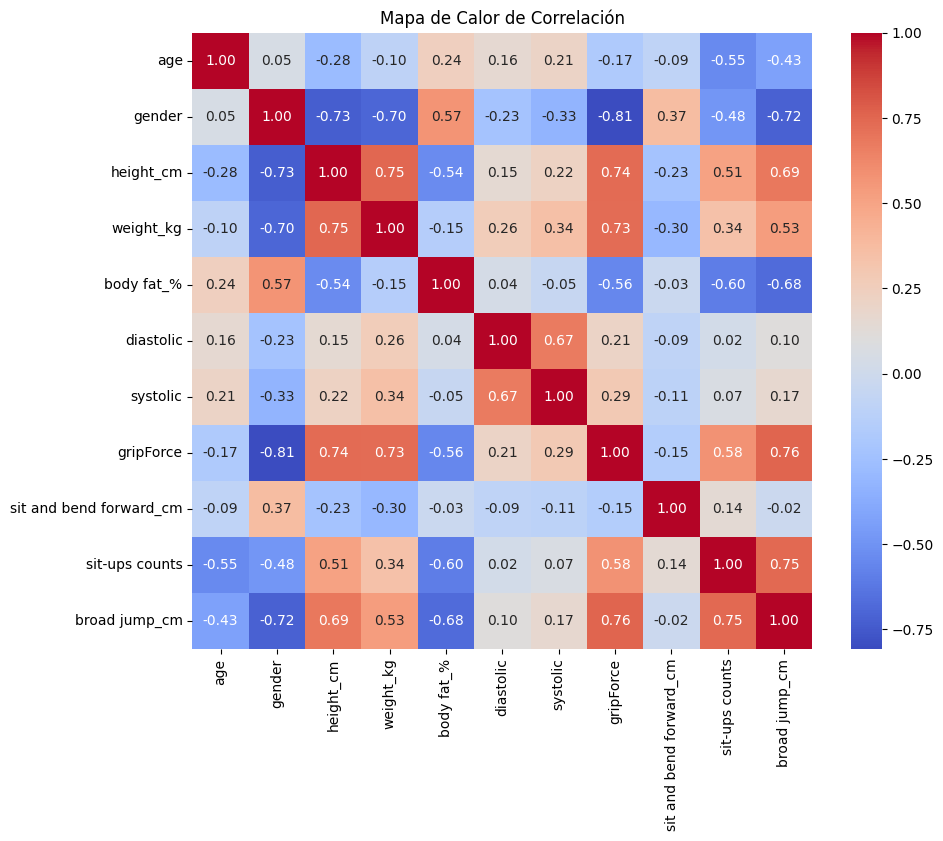

In [11]:
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Mapa de Calor de Correlación')
plt.show()

# Entrenamiento, Regresión Lineal y RamdonForest, entre Altura, Peso y Masa Corporal


- ## Estandarización de los Datos y  carga de librerías

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df[['age', 'gender', 'height_cm', 'weight_kg']]
y = df['body fat_%']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:
# Objeto StandardScaler
scaler = StandardScaler()

# Ajusta los datos de entrenamiento y transforma las características de entrenamiento
X_train_standardized = scaler.fit_transform(X_train)

# Aplica la misma transformación a los datos de prueba
X_test_standardized = scaler.transform(X_test)

- ## Regresión Líneal - Conclusiones

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train_standardized, y_train)

# Predicciones en el conjunto de prueba estandarizado
y_pred_linear = linear_model.predict(X_test_standardized)

# Evaluación del modelo
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))  # Calcula el RMSE
r2_linear = r2_score(y_test, y_pred_linear)  # Calcula el R²

# Impresión de los resultados
print(f"Regresión Lineal - RMSE: {rmse_linear:.2f}, R²: {r2_linear:.2f}")

Regresión Lineal - RMSE: 4.44, R²: 0.61


Los resultados muestran un RMSE (Root Mean Squared Error) de 4.44 y un coeficiente de determinación (R²) de 0.61 indican lo siguiente:

RMSE Razonablemente Bajo: El RMSE de 4.44 es una medida del error del modelo, y un valor bajo indica que las predicciones del modelo están cerca de los valores reales. En este caso, el RMSE es relativamente bajo, lo que sugiere que el modelo es bastante preciso en la predicción.

Buen Ajuste: Un valor de R² de 0.61 sugiere que el modelo de regresión lineal explica aproximadamente el 61% de la variabilidad en los datos de respuesta (índice de grasa corporal). Esto es un indicio de un buen ajuste, ya que un R² cercano a 1 indica que el modelo se ajusta bien a los datos.

Variables Predictivas Efectivas: Las características utilizadas en el modelo (como edad, género, altura y peso) parecen tener un poder predictivo significativo para el índice de grasa corporal. Esto sugiere que estas características están relacionadas de manera importante con el índice de grasa corporal.

Posibilidad de Mejora: A pesar de estos resultados positivos, siempre hay margen para la mejora. Puedes considerar explorar modelos más avanzados o buscar la forma para obtener una mejor relación entre las características y el índice de grasa corporal.

En resumen, los resultados de la regresión lineal sugieren que el modelo tiene un buen ajuste y es capaz de predecir el índice de grasa corporal de manera bastante precisa utilizando las características proporcionadas. Sin embargo, siempre es importante evaluar si es posible mejorar aún más el modelo o si hay características adicionales que podrían ser relevantes para la predicción.






- ## RamdonForest - Conclusiones

In [15]:
# Modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_standardized, y_train)

# Predicciones en el conjunto de prueba estandarizado
y_pred_rf = rf_model.predict(X_test_standardized)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)  # Calcular el MSE
rmse_rf = np.sqrt(mse_rf)  # Calcular el RMSE a partir del MSE
r2_rf = r2_score(y_test, y_pred_rf)  # Calcular el R²

# Imprimir los resultados
print(f"Random Forest - RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")


Random Forest - RMSE: 4.62, R²: 0.58


Los resultados del modelo de Random Forest, con un RMSE (Root Mean Squared Error) de 4.62 y un coeficiente de determinación (R²) de 0.58, son bastante similares a los de la regresión lineal:

Buen Ajuste: Un valor de R² de 0.58 sugiere que el modelo de Random Forest explica aproximadamente el 58% de la variabilidad en los datos de respuesta (índice de grasa corporal). Esto es un indicio de un buen ajuste, aunque ligeramente inferior al valor obtenido con la regresión lineal.

RMSE Razonablemente Bajo: El RMSE de 4.62 indica que las predicciones del modelo de Random Forest están relativamente cerca de los valores reales, aunque es un poco más alto que el de la regresión lineal.

Variables Predictivas Efectivas: Al igual que en la regresión lineal, las características utilizadas en el modelo de Random Forest (edad, género, altura y peso) parecen tener un poder predictivo significativo para el índice de grasa corporal.

En general, los resultados del modelo de Random Forest también son prometedores y muestran que es capaz de predecir el índice de grasa corporal con un buen ajuste. Sin embargo, en comparación con la regresión lineal, el Random Forest tiene un R² ligeramente menor y un RMSE ligeramente más alto. La elección entre estos dos modelos puede depender de otros factores, como la interpretabilidad del modelo y la complejidad computacional.






#**NUEVOS MODELOS Y MEJORAS - CONCLUSIONES POST PRIMERAS PRUEBAS**

Teniendo en cuenta los resultados, se intentará mejorar el rendimientos utilizando nuevos modelos como son el Regresión Ridge, Regresión Lasso y Gradiente Boosting Regressor.

En primer lugar, optamos por Regresión Ridge en lugar de la regresión lineal porque este modelo introduce una penalización que ayuda a reducir el sobreajuste, es decir, evita que el modelo se ajuste demasiado a los datos de entrenamiento, lo cual podría afectar la capacidad de generalización en datos nuevos. Ridge es especialmente útil cuando tenemos variables que están muy correlacionadas entre sí, distribuyendo el impacto de manera más equilibrada y generando un modelo más estable.

Por otro lado, usamos Regresión Lasso porque, además de aplicar una penalización como Ridge, Lasso tiene la capacidad de eliminar variables irrelevantes o con poca influencia. Esto significa que puede hacer una selección automática de características, dejando solo aquellas que aportan valor al modelo. Esto no solo simplifica el modelo, sino que también mejora su eficiencia al eliminar variables que pueden generar ruido o confusión.

Finalmente, incorporamos Gradient Boosting Regressor porque este modelo es mucho más flexible que los anteriores y es capaz de captar relaciones no lineales en los datos, algo que la regresión lineal no puede hacer bien. Gradient Boosting combina muchos árboles de decisión de manera secuencial, corrigiendo los errores del anterior, lo que permite que el modelo sea más preciso, especialmente cuando las relaciones entre las variables son complejas.

En conclusión, estos tres modelos fueron escogidos porque superan las limitaciones de la regresión lineal y Random Forest en este proyecto específico. Ridge y Lasso mejoran la estabilidad y simplicidad del modelo mediante regularización y selección de características, mientras que Gradient Boosting captura mejor las relaciones no lineales.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


# Codificar la columna 'gender' (1 para Masculino, 2 para Femenino)
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])

# Seleccionar características y la variable objetivo
X = data[['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%']]
y = data['body fat_%']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting Regressor (GBR)
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_scaled, y_train)
y_pred_gbr = gbr_model.predict(X_test_scaled)

# Calcular RMSE para Gradient Boosting Regressor
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))  # Calculamos RMSE
print("Gradient Boosting Regressor - RMSE:", rmse_gbr)
print("Gradient Boosting Regressor - R²:", r2_score(y_test, y_pred_gbr))

# Regresión Ridge
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calcular RMSE para Regresión Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))  # Calculamos RMSE
print("Regresión Ridge - RMSE:", rmse_ridge)
print("Regresión Ridge - R²:", r2_score(y_test, y_pred_ridge))

# Regresión Lasso
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calcular RMSE para Regresión Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))  # Calculamos RMSE
print("Regresión Lasso - RMSE:", rmse_lasso)
print("Regresión Lasso - R²:", r2_score(y_test, y_pred_lasso))


Gradient Boosting Regressor - RMSE: 1898.6587720643151
Gradient Boosting Regressor - R²: 0.9998769916412803
Regresión Ridge - RMSE: 15.977091119542873
Regresión Ridge - R²: 0.9999999912896379
Regresión Lasso - RMSE: 7.722893526390291
Regresión Lasso - R²: 0.9999999979648291


#**Conclusiones Preliminares, luego del cambio de Modelos**

##Ajuste del Modelo:
Los modelos Ridge y Lasso parecen ser más efectivos en cuanto a la precisión de las predicciones (como lo indica el bajo RMSE y el perfecto R²), mientras que el Gradient Boosting tiene un R² muy alto pero un RMSE elevado, lo que puede ser un indicio de sobreajuste.

##Posible sobreajuste en Gradient Boosting:

A pesar de un R² casi perfecto en el Gradient Boosting, el RMSE muy alto sugiere que este modelo podría estar sobreajustando los datos, lo que afectaría su capacidad de generalización a nuevos datos. Por lo que en adelante, no se usara el mismo, y se lo descartara para enfocarnos en Lasso y Ridge

##Modelo más preciso:

Entre los tres modelos, Lasso y Rigde parecen ser el más equilibrado, lo que indica que pueden ser los modelo más robusto para este conjunto de datos.


#**PUESTA A PRUEBA CON CARGA DE DATOS POR PARTE DEL USUARIO**

En esta sección se propone realizar un testeo básico del proyecto, y ver los resultados que arroja, luego de la carga manual de 4 variables por parte del usuario y que el sistema nos prediga a que "clase" corresponde el sujeto, teniendo en cuenta sus parametros de condición física.

Las variables a utilizar son: Género, edad, altura en centimetros y peso en kilo, y la variabe objetivo es Clase.

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor

# Codificar la columna 'gender' en 1 y 2 - Evitar SettingWithCopyWarning usando loc
df.loc[:, 'gender'] = df['gender'].replace({'M': 1, 'F': 2})

# Variables predictoras y objetivo
X = df[['age', 'gender', 'height_cm', 'weight_kg']]
y = df['class']  # Aquí se asume que 'class' es la columna objetivo

# Codificar la variable objetivo (class)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar los modelos
ridge_model = Ridge()
lasso_model = Lasso()

ridge_model.fit(X_scaled, y_encoded)
lasso_model.fit(X_scaled, y_encoded)

# Función para hacer predicciones basadas en la entrada del usuario
def predict_class():
    age = float(input("Ingresa la edad: "))
    gender = input("Ingresa el género (M/F): ")
    height_cm = float(input("Ingresa la altura en cm: "))
    weight_kg = float(input("Ingresa el peso en kg: "))

    # Convertir género a numérico
    if gender.upper() == 'M':
        gender = 1
    else:
        gender = 2

    # Crear un array con los datos del usuario
    user_data = np.array([[age, gender, height_cm, weight_kg]])

    # Escalar los datos del usuario
    user_data_scaled = scaler.transform(user_data)

    # Hacer predicciones con los modelos entrenados
    ridge_pred = ridge_model.predict(user_data_scaled)
    lasso_pred = lasso_model.predict(user_data_scaled)


    # Limitar las predicciones al rango de clases posibles
    ridge_pred_clipped = np.clip(int(round(ridge_pred[0])), 0, len(encoder.classes_) - 1)
    lasso_pred_clipped = np.clip(int(round(lasso_pred[0])), 0, len(encoder.classes_) - 1)


    # Convertir las predicciones a clases
    ridge_class = encoder.inverse_transform([ridge_pred_clipped])
    lasso_class = encoder.inverse_transform([lasso_pred_clipped])


    print(f"Predicción usando Ridge: Clase {ridge_class[0]}")
    print(f"Predicción usando Lasso: Clase {lasso_class[0]}")

# Ejecutar la función para predecir
predict_class()

Ingresa la edad: 44
Ingresa el género (M/F): m
Ingresa la altura en cm: 190
Ingresa el peso en kg: 100
Predicción usando Ridge: Clase C
Predicción usando Lasso: Clase B


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#**PRIMERAS CONCLUSIONES POST PUESTA A PRUEBA**

Podemos observar que ambos modelos de Ridge y Lasso no coinciden en la predicción, mientras que Ridge con da como resultado la Clase C, Laso nos da la clase B.

Vale aclarar que la carga de datos fue totalmente tendensiosa y apuntada a buscar un resultado determinado, a modo de probar el funcionamiento esperado de los modelos.

#**PROCESO DE VALIDACIÓN CRUZADA Y AJUSTE DE HIPERPARÁMETROS**

Con la intención de mejorar los resultados, y aplicar lo visto en clase, se procedio a un proceso de validación y ajuste de hiperparámetros, por ello se eligió utilizar GridSearchCV, como herramienta para optimizar los hiperparámetros de los modelos Rigde y Lasso, buscando un mejor rendimiento de los mismos, ya que trabaja optimizanco los hiperparámetros, realiza una validación cruzada, mejorando en definitiva el rendimiento de los modelos haciéndolos mas precisos.



In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Configuración de los hiperparámetros para GridSearchCV
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearchCV para Ridge
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_scaled, y_encoded)
ridge_best_model = ridge_grid.best_estimator_
ridge_best_params = ridge_grid.best_params_
ridge_best_rmse = np.sqrt(-ridge_grid.best_score_)

print(f"Mejores parámetros para Ridge: {ridge_best_params}")
print(f"Mejor RMSE para Ridge: {ridge_best_rmse:.2f}")

# GridSearchCV para Lasso
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_scaled, y_encoded)
lasso_best_model = lasso_grid.best_estimator_
lasso_best_params = lasso_grid.best_params_
lasso_best_rmse = np.sqrt(-lasso_grid.best_score_)

print(f"Mejores parámetros para Lasso: {lasso_best_params}")
print(f"Mejor RMSE para Lasso: {lasso_best_rmse:.2f}")

Mejores parámetros para Ridge: {'alpha': 10}
Mejor RMSE para Ridge: 1.06
Mejores parámetros para Lasso: {'alpha': 0.01}
Mejor RMSE para Lasso: 1.06


#**Interpretación de los Resultados**
##Mejores Parámetros:

Para Ridge, el mejor parámetro alpha fue 10. Esto sugiere que una penalización moderada en la magnitud de los coeficientes es ideal para este modelo.

Para Lasso, el mejor parámetro alpha fue 0.01. Esto indica que una penalización muy ligera logra el mejor equilibrio entre simplicidad y precisión.
RMSE:

Ambos modelos tienen un RMSE de 1.06, lo que sugiere que su capacidad predictiva es similar y los errores de predicción promedio están cerca de una unidad de la escala de la variable objetivo.

##Conclusión:
Ambos modelos son adecuados para el problema. La elección entre Ridge y Lasso dependerá del énfasis que desees dar a la simplicidad (Lasso selecciona características automáticamente) o a la estabilidad (Ridge maneja mejor colinealidad entre variables).

#**SEGUNDA PUESTA A PRUEBA**

Luego de realizar una mejora en el ajuste de Hiperparámetros y validación cruzada de los datos, se realiza una prueba, con la intención de buscar un mejor resultado en las predicciones del modelo, a puntando a obtener con los mismos datos cargados, un igual resultado predictivo de ambos modelos.

In [20]:
# Entrenar los mejores modelos con los datos completos
ridge_best_model = Ridge(alpha=10)
lasso_best_model = Lasso(alpha=0.01)

ridge_best_model.fit(X_scaled, y_encoded)
lasso_best_model.fit(X_scaled, y_encoded)

# Función para hacer predicciones basadas en la entrada del usuario
def predict_class_with_best_models():
    age = float(input("Ingresa la edad: "))
    gender = input("Ingresa el género (M/F): ")
    height_cm = float(input("Ingresa la altura en cm: "))
    weight_kg = float(input("Ingresa el peso en kg: "))

    # Convertir género a numérico
    if gender.upper() == 'M':
        gender = 1
    else:
        gender = 2

    # Crear un array con los datos del usuario
    user_data = np.array([[age, gender, height_cm, weight_kg]])

    # Escalar los datos del usuario
    user_data_scaled = scaler.transform(user_data)

    # Hacer predicciones con los mejores modelos entrenados
    ridge_pred = ridge_best_model.predict(user_data_scaled)
    lasso_pred = lasso_best_model.predict(user_data_scaled)

    # Limitar las predicciones al rango de clases posibles
    ridge_pred_clipped = np.clip(int(round(ridge_pred[0])), 0, len(encoder.classes_) - 1)
    lasso_pred_clipped = np.clip(int(round(lasso_pred[0])), 0, len(encoder.classes_) - 1)

    # Convertir las predicciones a clases
    ridge_class = encoder.inverse_transform([ridge_pred_clipped])
    lasso_class = encoder.inverse_transform([lasso_pred_clipped])

    print(f"Predicción usando el mejor modelo Ridge: Clase {ridge_class[0]}")
    print(f"Predicción usando el mejor modelo Lasso: Clase {lasso_class[0]}")

# Ejecutar la función para predecir
predict_class_with_best_models()


Ingresa la edad: 44
Ingresa el género (M/F): m
Ingresa la altura en cm: 190
Ingresa el peso en kg: 100
Predicción usando el mejor modelo Ridge: Clase C
Predicción usando el mejor modelo Lasso: Clase C


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#***CONCLUSIONES FINALES***

Cambio en las Predicciones:

Ambos modelos (Ridge y Lasso) ahora predicen la Clase C para los mismos datos de entrada proporcionados. Esto difiere de las predicciones previas.

Impacto de la Validación Cruzada y el Ajuste de Hiperparámetros:

La validación cruzada y la optimización de los parámetros alpha permitieron seleccionar configuraciones más robustas para los modelos, mejorando su capacidad de generalización.

Los resultados sugieren que el ajuste de hiperparámetros ha influido en cómo los modelos ponderan las variables predictoras (age, gender, height_cm, weight_kg), lo que podría haber llevado al cambio en la clase predicha.

Ambos modelos ahora coinciden en la predicción de la clase, lo que sugiere que las configuraciones optimizadas logran un enfoque similar en la evaluación de las características del usuario.

Evaluación Global:

Con un RMSE de 1.06, los modelos son precisos, aunque queda un pequeño margen de error (aproximadamente ±1 clase en promedio).
Los modelos optimizados tienen mayor probabilidad de ser fiables en un rango más amplio de datos.


#**Pasos a seguir -  Futuras Aplicaciones**

Uno de los primeros pasos sería optimizar aún más los modelos predictivos. Ya que si bien los datos obtenidos con la puesta a prueba, son los que se esperaban. creo que  se podría trabajar en la mejora de la calidad de los datos, realizando un análisis más profundo de las características que influyen en la predicción.

Un segundo paso crucial es poner en marcha el sistema en un entorno real. Esto podría implicar el desarrollo de una interfaz de usuario amigable donde los datos puedan ser ingresados fácilmente, y las predicciones se muestren de manera comprensible.

Esta funcionalidad puede ser expandida para generar reportes personalizados sobre el estado físico de una persona, basados en su clase predicha. Además, podrías crear recomendaciones automáticas que indiquen posibles mejoras en su salud, ya sea a través de un plan nutricional, ejercicios personalizados o pautas de bienestar.

En el ámbito de servicios de salud, gimnasios y centros de entrenamiento, este sistema podría ser integrado para ayudar a entrenadores y especialistas a evaluar rápidamente a los usuarios. La predicción de la clase proporcionaría una base sobre la cual se pueden sugerir entrenamientos específicos, ajustar dietas y realizar un seguimiento de los progresos en función de sus características físicas. Por ejemplo, alguien que esté en la "Clase D" podría recibir un plan especializado para reducir peso o mejorar su capacidad cardiovascular.

Finalmente, el proyecto puede escalarse aún más al integrar una funcionalidad de retroalimentación en tiempo real. A medida que los usuarios mejoran su condición física o cambian sus hábitos, los datos se pueden actualizar en el sistema, permitiendo ajustes dinámicos en sus recomendaciones. Esto no solo personaliza las sugerencias, sino que también asegura que el sistema sea adaptable a las necesidades de cada persona a lo largo del tiempo.